In [2]:
%matplotlib inline
import missingno as msno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
from google.colab import drive # gdrive 연동
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 10만개 데이터

In [4]:
# Disease 

df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/aiffel_data/Hackerton_2/data_dis_vs_nor.csv', encoding='cp949') # upsampling 안된 것!
df

,SEX,BTH_G,SBP,DBP,FBS,BMI,Dis
0,0,1,116,78,94,16.6,0
1,0,1,100,60,79,22.3,0
2,0,1,100,60,87,21.9,0
3,0,1,111,70,72,20.2,0
4,0,1,120,80,98,20.0,0
...,...,...,...,...,...,...,...
999995,1,27,120,70,81,23.1,1
999996,1,27,110,70,104,27.2,1
999997,1,27,115,53,110,25.2,1
999998,1,27,120,70,90,19.7,1


In [6]:
df.notnull().sum()

SEX      1000000
BTH_G    1000000
SBP      1000000
DBP      1000000
FBS      1000000
BMI      1000000
Dis      1000000
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   SEX     1000000 non-null  int64  
 1   BTH_G   1000000 non-null  int64  
 2   SBP     1000000 non-null  int64  
 3   DBP     1000000 non-null  int64  
 4   FBS     1000000 non-null  int64  
 5   BMI     1000000 non-null  float64
 6   Dis     1000000 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 53.4 MB


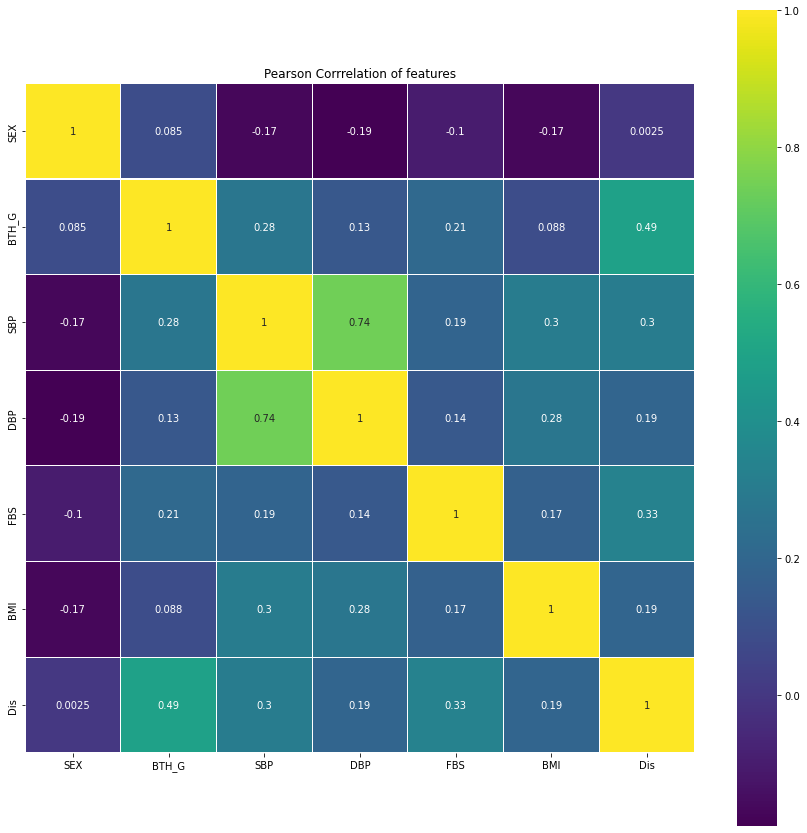

In [8]:
colormap = plt.cm.viridis # pearson 상관 계수 확인 ---> heatmap
plt.figure(figsize=(15,15))
plt.title("Pearson Corrrelation of features")
sns.heatmap(df.corr(), cmap=colormap, annot=True, linewidths=0.1, vmax=1.0, 
            square=True, linecolor='white')

In [9]:
# split data

from sklearn.model_selection import train_test_split

# 전체 데이터 split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Dis'],df['Dis'],  stratify=df['Dis'], shuffle=True, test_size=0.9, random_state=11)

X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.88, shuffle=True) # validation은 사용하지 않음


print(X_train.shape)
print(y_train.shape)
print(X_val.shape) # validation set은 사용하지 않음
print(y_val.shape) # 역시
print(X_test.shape)
print(y_test.shape)

(100000, 6)
(100000,)
(792000, 6)
(792000,)
(108000, 6)
(108000,)


In [10]:
X_train.shape

(100000, 6)

In [11]:
X_test.shape

(108000, 6)

In [12]:
y_train.shape

(100000,)

In [13]:
y_test.shape

(108000,)

**Logistic Regression**

In [14]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀


LR = LogisticRegression() # 로지스틱 회귀 분석
LR.fit(X_train,y_train)

print("train score : {}".format(LR.score(X_train, y_train)))

predict_y = LR.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, LR.predict(X_test)))
print("test score : {}".format(LR.score(X_test, y_test)))

train score : 0.8193
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     80159
           1       0.69      0.53      0.60     27841

    accuracy                           0.82    108000
   macro avg       0.77      0.72      0.74    108000
weighted avg       0.81      0.82      0.81    108000

test score : 0.8170925925925926


## Upsampling 데이터

In [22]:
# Disease 

df2 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/aiffel_data/Hackerton_2/data_over_sampling.csv', encoding='cp949') # upsampling 안된 것!
df2

,SEX,BTH_G,SBP,DBP,FBS,BMI,Dis
0,1,1,116,78,94,16.6,0
1,1,1,100,60,79,22.3,0
2,1,1,100,60,87,21.9,0
3,1,1,111,70,72,20.2,0
4,1,1,120,80,98,20.0,0
...,...,...,...,...,...,...,...
1481319,0,25,120,80,78,27.9,1
1481320,0,27,150,74,133,32.0,1
1481321,1,25,120,70,118,26.9,1
1481322,0,20,136,68,93,21.5,1


In [16]:
df2.notnull().sum()

SEX      1481324
BTH_G    1481324
SBP      1481324
DBP      1481324
FBS      1481324
BMI      1481324
Dis      1481324
dtype: int64

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481324 entries, 0 to 1481323
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   SEX     1481324 non-null  int64  
 1   BTH_G   1481324 non-null  int64  
 2   SBP     1481324 non-null  int64  
 3   DBP     1481324 non-null  int64  
 4   FBS     1481324 non-null  int64  
 5   BMI     1481324 non-null  float64
 6   Dis     1481324 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 79.1 MB


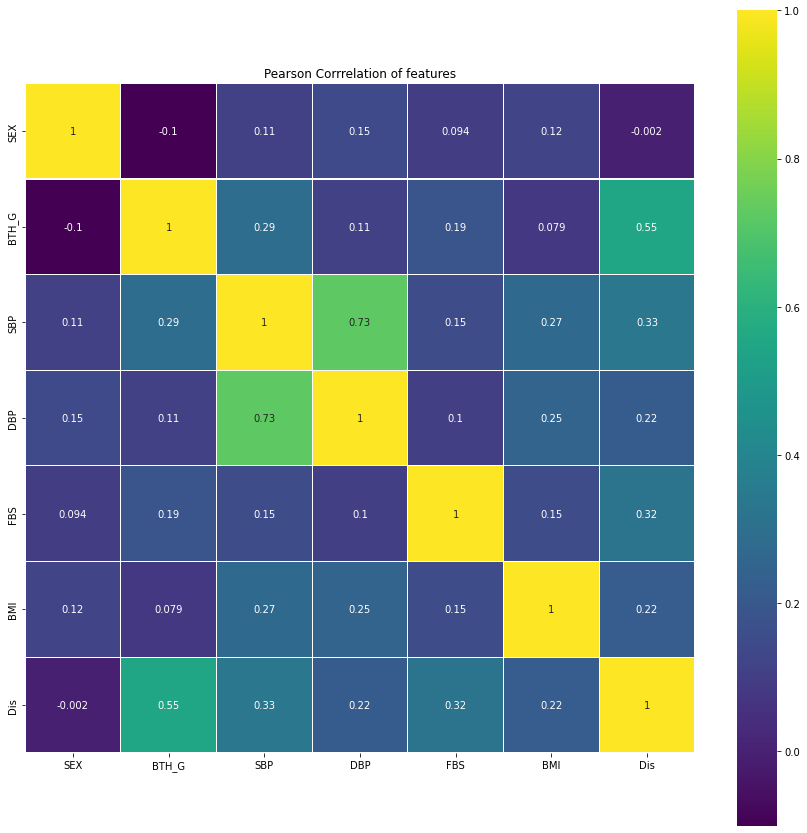

In [18]:
colormap = plt.cm.viridis # pearson 상관 계수 확인 ---> heatmap
plt.figure(figsize=(15,15))
plt.title("Pearson Corrrelation of features")
sns.heatmap(df2.corr(), cmap=colormap, annot=True, linewidths=0.1, vmax=1.0, 
            square=True, linecolor='white')

In [19]:
# Over sampling data
# split data

from sklearn.model_selection import train_test_split

# 전체 데이터 split
X_up_train, X_up_test, y_up_train, y_up_test = train_test_split(df2.loc[:, df2.columns != 'Dis'],df2['Dis'],  stratify=df2['Dis'], shuffle=True, test_size=0.9, random_state=11)

X_up_test,X_up_val,y_up_test,y_up_val=train_test_split(X_up_test,y_up_test,test_size=0.88, shuffle=True) # validation은 사용하지 않음


print(X_up_train.shape)
print(y_up_train.shape)
# print(X_up_val.shape) # validation set은 사용하지 않음
# print(y_up_val.shape) # 역시
print(X_up_test.shape)
print(y_up_test.shape)

(148132, 6)
(148132,)
(1173209, 6)
(1173209,)
(159983, 6)
(159983,)


In [20]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀

LR = LogisticRegression() # 로지스틱 회귀 분석
LR.fit(X_up_train,y_up_train)

print("train score : {}".format(LR.score(X_up_train, y_up_train)))

predict_y = LR.predict(X_up_test)

from sklearn.metrics import classification_report
print(classification_report(y_up_test, LR.predict(X_up_test)))
print("test score : {}".format(LR.score(X_up_test, y_up_test)))

train score : 0.7903558987929684
              precision    recall  f1-score   support

           0       0.80      0.78      0.79     79911
           1       0.78      0.80      0.79     80072

    accuracy                           0.79    159983
   macro avg       0.79      0.79      0.79    159983
weighted avg       0.79      0.79      0.79    159983

test score : 0.7903839782976941


-----------------------------------------------------------------------------------------------------------------------------------------------------------------

## 전체 데이터

In [7]:
# split data

from sklearn.model_selection import train_test_split

# 전체 데이터 split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Dis'],df['Dis'],  stratify=df['Dis'], shuffle=True, test_size=0.9, random_state=11)

print(X_train.shape)
print(y_train.shape)
# print(X_val.shape) # validation set은 사용하지 않음
# print(y_val.shape) # 역시
print(X_test.shape)
print(y_test.shape)

(100000, 6)
(100000,)
(900000, 6)
(900000,)


In [22]:
# LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#                    intercept_scaling=1, l1_ratio=None, max_iter=100,
#                    multi_class='auto', n_jobs=None, penalty='l2',
#                    random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
#                    warm_start=False)

In [29]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀

LR = LogisticRegression() # 로지스틱 회귀 분석
LR.fit(X_train,y_train)

print("train score : {}".format(LR.score(X_train, y_train)))

predict_y = LR.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, LR.predict(X_test)))
print("test score : {}".format(LR.score(X_test, y_test)))

train score : 0.8193
              precision    recall  f1-score   support

           0       0.85      0.92      0.88    666596
           1       0.69      0.54      0.60    233404

    accuracy                           0.82    900000
   macro avg       0.77      0.73      0.74    900000
weighted avg       0.81      0.82      0.81    900000

test score : 0.8177177777777778


In [30]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [31]:
from sklearn.model_selection import GridSearchCV


In [32]:
clf = GridSearchCV(LR, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [33]:
best_clf = clf.fit(X_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

In [34]:
best_clf.best_estimator_

LogisticRegression(C=3792.690190732246, solver='liblinear')

**Hyperparameter 나옴**

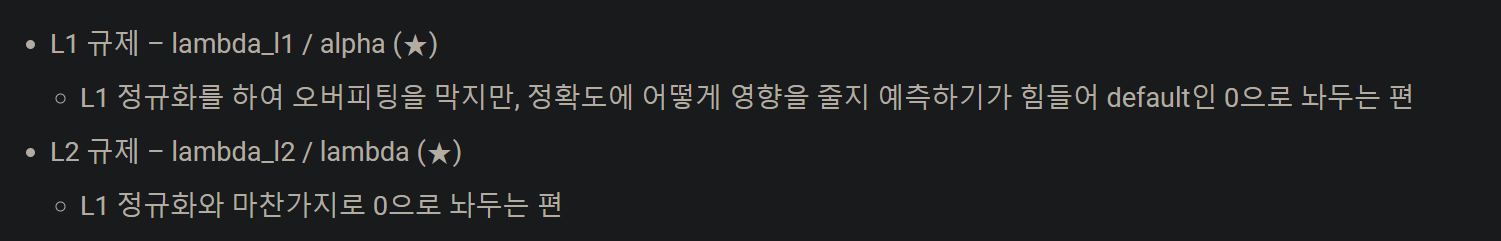

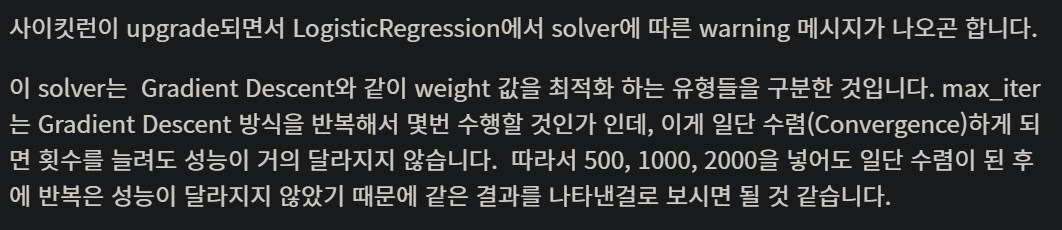

LogisticRegression(C=3792.690190732246, solver='liblinear')

In [36]:
print (f'Accuracy - : {best_clf.score(X_train,y_train):.3f}')

Accuracy - : 0.819


**Hyperparameter tunning**

## 전체 Upsampling 데이터 

In [23]:
# Over sampling data
# split data

from sklearn.model_selection import train_test_split

# 전체 데이터 split
X_up_train, X_up_test, y_up_train, y_up_test = train_test_split(df2.loc[:, df2.columns != 'Dis'],df2['Dis'],  stratify=df2['Dis'], shuffle=True, test_size=0.2, random_state=11)

# X_up_test,X_up_val,y_up_test,y_up_val=train_test_split(X_up_test,y_up_test,test_size=0.88, shuffle=True) # validation은 사용하지 않음


print(X_up_train.shape)
print(y_up_train.shape)
# print(X_up_val.shape) # validation set은 사용하지 않음
# print(y_up_val.shape) # 역시
print(X_up_test.shape)
print(y_up_test.shape)

(1185059, 6)
(1185059,)
(296265, 6)
(296265,)


In [24]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀

LR = LogisticRegression() # 로지스틱 회귀 분석
LR.fit(X_up_train,y_up_train)

print("train score : {}".format(LR.score(X_up_train, y_up_train)))

predict_y = LR.predict(X_up_test)

from sklearn.metrics import classification_report
print(classification_report(y_up_test, LR.predict(X_up_test)))
print("test score : {}".format(LR.score(X_up_test, y_up_test)))

train score : 0.7899049751953279
              precision    recall  f1-score   support

           0       0.80      0.78      0.79    148132
           1       0.78      0.80      0.79    148133

    accuracy                           0.79    296265
   macro avg       0.79      0.79      0.79    296265
weighted avg       0.79      0.79      0.79    296265

test score : 0.7895195179990887


# SGDclassifier

**전체 Upsampling Data**

In [31]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_up_train, y_up_train)

print("train score : {}".format(sgd_clf.score(X_up_train, y_up_train)))

predict_y = sgd_clf.predict(X_up_test)

from sklearn.metrics import classification_report
print(classification_report(y_up_test, sgd_clf.predict(X_up_test)))
print("test score : {}".format(sgd_clf.score(X_up_test, y_up_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


train score : 0.7757166520823013
              precision    recall  f1-score   support

           0       0.77      0.78      0.78    148132
           1       0.78      0.77      0.78    148133

    accuracy                           0.78    296265
   macro avg       0.78      0.78      0.78    296265
weighted avg       0.78      0.78      0.78    296265

test score : 0.7754611580848227


In [26]:
print(confusion_matrix(y_up_test, predict_y))

[[116514  31618]
 [ 35304 112829]]


In [27]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

print("train score : {}".format(sgd_clf.score(X_train, y_train)))

predict_y = sgd_clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, sgd_clf.predict(X_test)))
print("test score : {}".format(sgd_clf.score(X_test, y_test)))

train score : 0.81089
              precision    recall  f1-score   support

           0       0.86      0.88      0.87    666596
           1       0.64      0.60      0.62    233404

    accuracy                           0.81    900000
   macro avg       0.75      0.74      0.75    900000
weighted avg       0.81      0.81      0.81    900000

test score : 0.8092766666666666


In [28]:
model = SGDClassifier(loss="hinge", penalty="l2")

In [11]:
model.fit(X_train, y_train)

SGDClassifier()

In [12]:
model.score(X_test, y_test)


0.8016311111111111

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

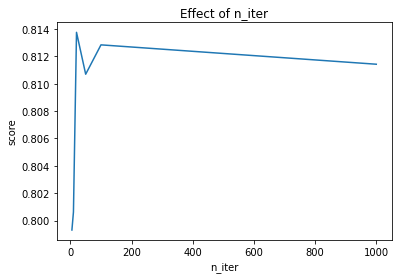

In [13]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    model = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores) 

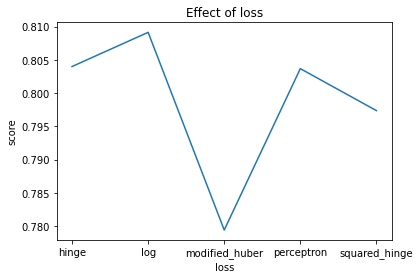

In [14]:
# losses
losses = ["hinge", "log", "modified_huber", "perceptron", "squared_hinge"]
scores = []
for loss in losses:
    model = SGDClassifier(loss=loss, penalty="l2", max_iter=1000)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
  
plt.title("Effect of loss")
plt.xlabel("loss")
plt.ylabel("score")
x = np.arange(len(losses))
plt.xticks(x, losses)
plt.plot(x, scores) 

In [15]:
data = df.values

In [16]:
np.random.shuffle(data)
from sklearn.model_selection import GridSearchCV

params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

model = SGDClassifier(max_iter=1000)
clf = GridSearchCV(model, param_grid=params)

In [17]:
clf.fit(X_train, y_train)
print(clf.best_score_)

0.812


In [18]:
print(clf.best_estimator_)

SGDClassifier(alpha=0.01, loss='modified_huber')


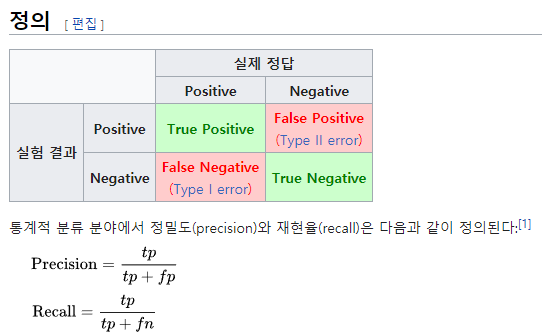

In [32]:
from sklearn.metrics import precision_score, recall_score
# 정밀도 값
# 스팸메일 필터에서 많이 쓰인다. 정상 메일을 스팸처리해서 삭제해버리면 안되기 때문 FP값: 실제 음성(정상)인데 양성(스팸)이라고 판별
precision_score(y_up_test, predict_y)

0.7761086977115559

In [33]:
# 재현율 값 
# 진단 분야에서는 재현율 값이 중요! 왜냐하면 환자를 정상으로 판별하면 안되기 때문이다. FN값 : 양성(환자)을 음성(정상)으로 판단
recall_score(y_up_test, predict_y)

0.7742906712211324

In [34]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_up_test, predict_y)

정밀도와 재현율의 조화 평균으로 나타낸 F1 score

In [35]:
from sklearn.metrics import f1_score
f1_score(y_up_test, predict_y)

0.7751986185408845

In [36]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_up_test, predict_y)

In [37]:
fpr, tpr, threshold = roc_curve(y_up_test, predict_y)
print("FPR:\n\n", fpr)


print("-"*100)

print("TPR:\n\n", tpr)

FPR:

 [0.         0.22336835 1.        ]
----------------------------------------------------------------------------------------------------
TPR:

 [0.         0.77429067 1.        ]


ROC curve plot

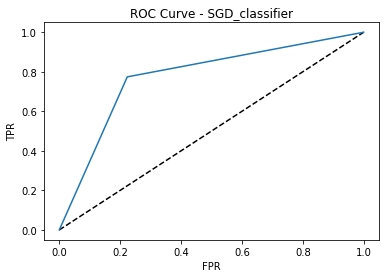

In [38]:
plt.plot([0, 1], [0, 1], "k--", label = '50% AUC')
plt.plot(fpr, tpr, label = "SGD_classifier")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - SGD_classifier")
plt.show()

[Hyperparameter 정보들](https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/)

[Hyperparameter 정보들2](https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/)

[Hyperparameter 정보들3](https://hyemin-kim.github.io/2020/07/26/S-Python-sklearn2/)

[Hyperparameter tuning baseline code](https://www.kaggle.com/code/funxexcel/p2-logistic-regression-hyperparameter-tuning/notebook)

In [ ]:
# LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#                    intercept_scaling=1, l1_ratio=None, max_iter=100,
#                    multi_class='auto', n_jobs=None, penalty='l2',
#                    random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
#                    warm_start=False)

In [ ]:
# SGDClassifier(alpha=0.0001, average=False, class_weight=None,
#               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
#               l1_ratio=0.15, learning_rate='optimal', loss='hinge',
#               max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
#               power_t=0.5, random_state=0, shuffle=True, tol=0.001,
#               validation_fraction=0.1, verbose=0, warm_start=False)